In [7]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import denaturationpy as dp

from plotnine import *

In [8]:
system = dp.System(273.3+40)
fgf2_concentration = dp.FGF2Concentration('fgf2', system,
    agg_Ea=264500, agg_Tf=347.6, misfold_prob=0.9)
fgf2_concentration.set_initial(10e-6,0,0)
urea_concentration = dp.FixedConcentration('urea', 0)
fgf2_concentration.add_denaturant(urea_concentration, -8745)
fgf2_concentration.kf2_enthalpy = 34000
system.add_concentration(fgf2_concentration)
system.add_concentration(urea_concentration)

In [9]:
data = pd.DataFrame()
ureas = np.linspace(0, 1, 5)
temperatures = list(range(33, 41))
for t in temperatures:
    for urea in ureas:
        system.t = 0
        system.y = system.y0()
        system.temperature = 273 + t
        urea_concentration.c0 = urea
        result = system.solve(2*7*24*60*60, 100000, method='LSODA')
        result['temperature'] = t
        data = data.append(result, ignore_index=True)

/tmp/ipykernel_3417/1283696927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Paper Figures/Urea Dependent Aggregation.png
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 14 rows containing missing values.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 14 rows containing missing values.


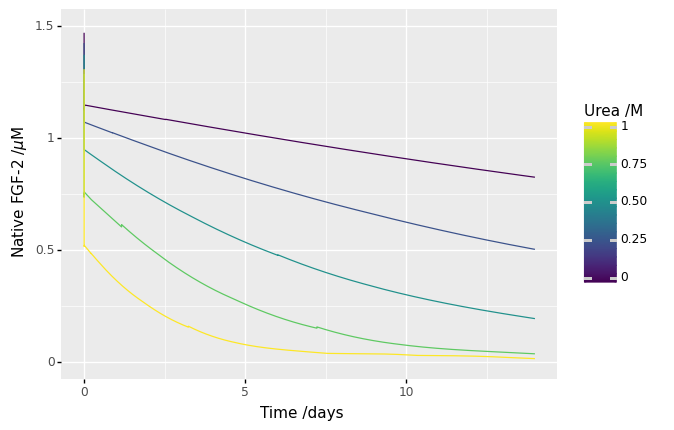

<ggplot: (8787930447357)>

In [10]:
r = data.query('temperature==35')
r['fgf2_native'] *= 1e6
r = r[['t', 'fgf2_native', 'urea']].melt(['t', 'urea'])
r['t'] /= 24*60*60
p = (
    ggplot(r, aes(x='t', y='value', group='urea', colour='urea')) +
    geom_line() + ylim(0, 1.5) +
    xlab('Time /days') + ylab(r'Native FGF-2 /$\mu M$') +
    labs(colour='Urea /M') + theme(legend_direction='vertical')
)
p.save('Paper Figures/Urea Dependent Aggregation.png')
p

/tmp/ipykernel_3417/3620736859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Paper Figures/Temperature Dependent Aggregation.png
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 41 rows containing missing values.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 41 rows containing missing values.


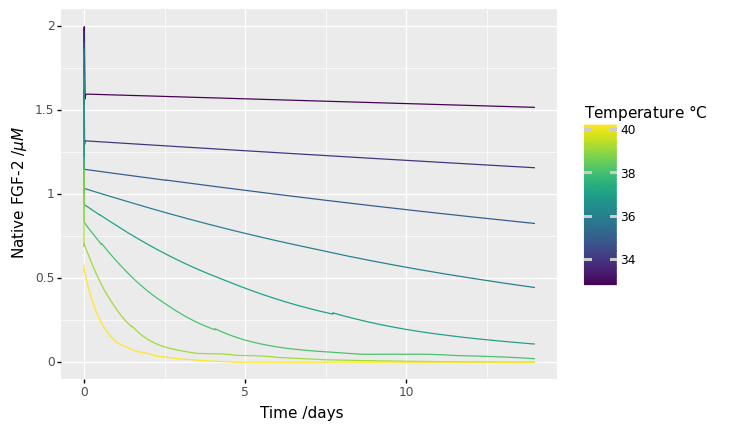

<ggplot: (8787891331286)>

In [11]:
r = data.query('urea==0')
r['fgf2_native'] *= 1e6
r = r[r.temperature.isin(r.temperature.unique()[::])]
r = r[['t', 'fgf2_native', 'temperature']].melt(['t', 'temperature'])
r['t'] /= 24*60*60
p = (
    ggplot(r, aes(x='t', y='value', group='temperature', colour='temperature')) +
    geom_line() + ylim(0,2) +
    xlab('Time /days') + ylab(r'Native FGF-2 /$\mu M$') +
    labs(colour=r'Temperature $\degree$C')
)
p.save('Paper Figures/Temperature Dependent Aggregation.png')
p